## **In this notebook, we are going to explore ways in which we can predict whether a customer is going to successfuly convert in a marketing campaign:**

Dataset is a sample marketing campaign conversion dataset from kaggle https://www.kaggle.com/datasets/davinwijaya/customer-retention, which gives us basic information on the customer and whether they converted or not from the campaign.

**Let's beginning by looking at our cleaned file:**

**what are our dependant variables?**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('marketing_train3.csv',error_bad_lines=False)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['Log purchase values'], axis = 1, inplace = True)
df.drop(['offer'], axis = 1, inplace = True)

<ipython-input-2-14b4d88c5d70>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('marketing_train3.csv',error_bad_lines=False)


These are the columns we have:


*   Months since last purchase
*   Total purchase value till date
*   Did the customer use a discount? (1 = Yes, 0 = No)
*   Did the customer use a buy one get one offer?
*   Which area does the customer come from (Suburban, Rural or Urban)?
*   Did the customer come through a referral?
*   Which channel did the customer come through? (phone, website, multichannel)
*   Did the customer convert from the marketing campaign? (Yes/No)






In [3]:
df.head(3)

,Mons last purchase,total purchase val yet,used_discount,used_bogo,zip_code,is_referral,channel,conversion
0,10,142.44,1,0,Surburban,0,Phone,0
1,6,329.08,1,1,Rural,1,Web,0
2,7,180.65,0,1,Surburban,1,Web,0


**What does the distribution of our independant variable look like?**

Our independent variable is the conversion column, which stands for whether a customers bought the good or not after the marketing campaign.

Text(0.5, 1.0, 'What % of customers were converted?')

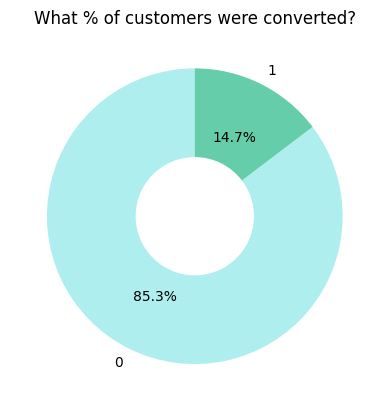

In [4]:
import matplotlib.pyplot as plt

colors = ['paleturquoise','mediumaquamarine']

seg3 = pd.DataFrame(df.groupby('conversion').agg({'conversion':pd.Series.count}))
plt.pie(seg3.conversion, labels= seg3.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
plt.title('What % of customers were converted?')

In [5]:
print('Count of converted: ', df['conversion'].sum())

Count of converted:  9394


14.7% of customers were converted, which is a sample size of 9,394 customers.

# **How do our columns correlate with the conversion column?**

**Before we create the correlation matrix, lets create dummies for the non numeric columns:**

Dummies for zipcode and channel:

In [6]:
zip_dummies = pd.get_dummies(df['zip_code'])
channel_dummies = pd.get_dummies(df['channel'])
zip_dummies

,Rural,Surburban,Urban
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
63995,0,0,1
63996,0,0,1
63997,0,0,1
63998,0,1,0


In [7]:
df_2 = pd.concat([df, zip_dummies], axis=1)  
df_3 = pd.concat([df_2, channel_dummies], axis=1)  
df_3.head(1)

,Mons last purchase,total purchase val yet,used_discount,used_bogo,zip_code,is_referral,channel,conversion,Rural,Surburban,Urban,Multichannel,Phone,Web
0,10,142.44,1,0,Surburban,0,Phone,0,0,1,0,0,1,0


Dropping the zip code  and channel column, now that we have created dummies

In [ ]:
df_3.drop(['zip_code'],axis = 1, inplace = True)
df_3.drop(['channel'],axis = 1, inplace = True)

<Axes: >

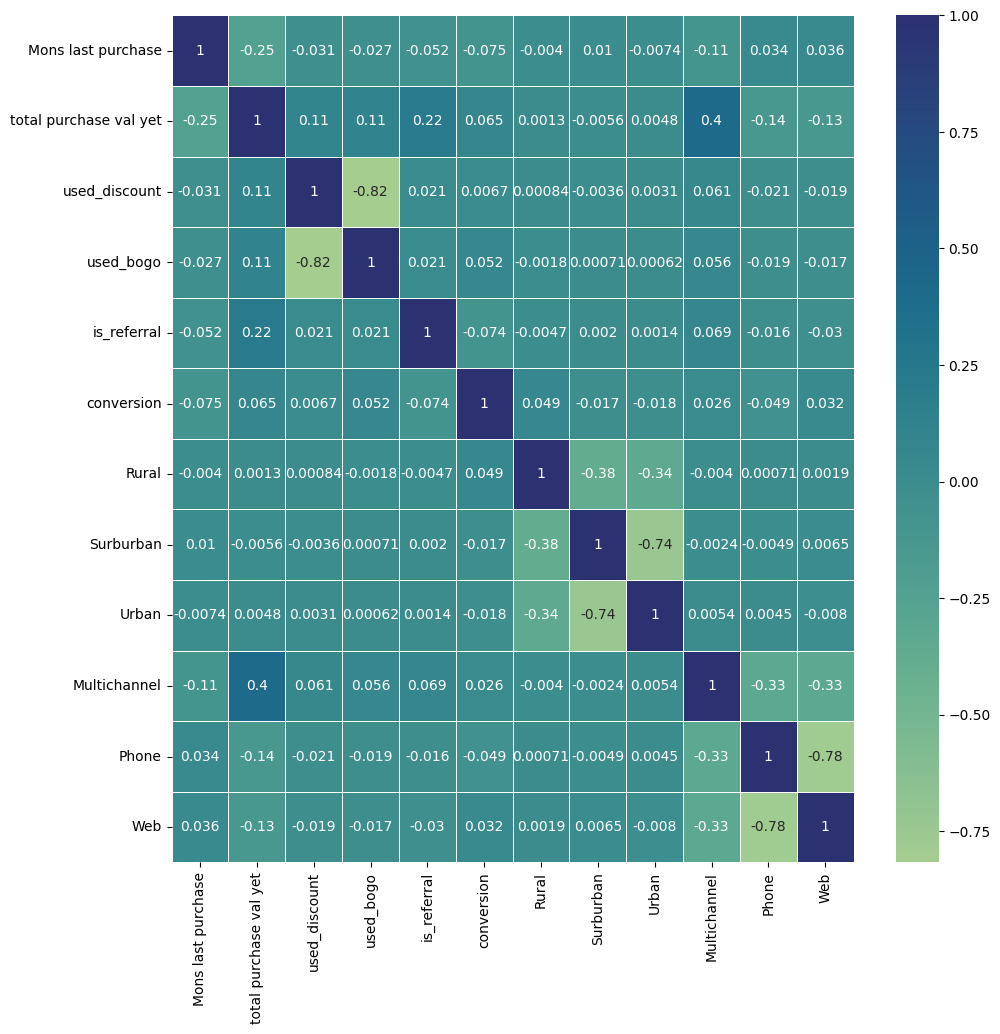

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11,11))
corr = df_3.corr()
sns.heatmap(corr,annot = True, linewidths=.5,cmap = 'crest',ax = ax)



*   Since the correlation between used_bogo and used_discount is high (-0.82) we can drop used_bogo to reduce variance. We can also drop one highly correlated dummie from each categorical variable to avoid multicollinearity.
*   None of the correlation columns with conversion are high i.e. > 0.1.
*  Customers seem less likely to convert if they have come through a phone/referral channel and if they live in an Urban/Suburban area.
*  Customers are also less likely to purchase goods if its been a lot of months since their last purchase. This might indicate some sort of recency effect.
*  The recency effect might also substantiated by the fact that there is a positive correlation between purchase values and conversion. Hence, it might be the case that high purchase values indicate repeat purchases.







In [ ]:
df_3.drop(['used_bogo'],axis =1,inplace = True)
df_3.drop(['Phone'],axis = 1, inplace = True)
df_3.drop(['Surburban'],axis = 1, inplace = True)

## **Predicting campaign conversion using three different approaches:**



*  **Logistic Regression**
*   **Decision Tree**
*   **Random Forest**
*   **KNN** 





**Predicting campaign conversion using logistic regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
log_reg = LogisticRegression()

In [ ]:
X = df_3.drop(['conversion'],axis = 1)
y = df_3['conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Fitting the model**

In [ ]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Creating the predictions**

In [ ]:
pred_log = log_reg.predict(X_test)

**How did our model fare?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     16431
           1       1.00      0.00      0.00      2769

    accuracy                           0.86     19200
   macro avg       0.93      0.50      0.46     19200
weighted avg       0.88      0.86      0.79     19200



**What do our coefficents look like?**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.425031
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   -0.019    
Dependent Variable:   conversion         AIC:                54419.9817
Date:                 2023-06-03 17:06   BIC:                54492.5148
No. Observations:     64000              Log-Likelihood:     -27202.   
Df Model:             7                  LL-Null:            -26693.   
Df Residuals:         63992              LLR p-value:        1.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Mons last purchase     -0.1525   0.0027 -56.7440 0.0000 -0.1577


*   The model has a high f1 score (0.92) and a good precision rate (0.86) for predicting not coverted customers, however it has a poor f1 score and precision for predicting converted customers. Given that it is more important for us to know correct predictions for converted customers, this model is not a good fit.
*   All co-efficients except total purchase value and the rural co-efficient are significant. 
*   Th pseudo R-squared is very low at -0.019, despite extremely small p-values (0.0000). This indicates that there is a lot of variability (noise) in data points. We might have more precise results with a bigger sample/more data with demographic features of customers.


**Predicting campaign conversion using a Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier() 

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtree = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     16431
           1       0.17      0.16      0.16      2769

    accuracy                           0.76     19200
   macro avg       0.51      0.51      0.51     19200
weighted avg       0.76      0.76      0.76     19200



In [ ]:
confusion_matrix(y_test,pred_dtree)

array([[14244,  2187],
       [ 2329,   440]])

**Predicting campaign conversion using a random forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

error = []
for i in range(100,601,50):
  rfc = RandomForestClassifier(n_estimators=i)
  rfc.fit(X_train,y_train)
  pred_i = rfc.predict(X_test)
  error.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error Rate')

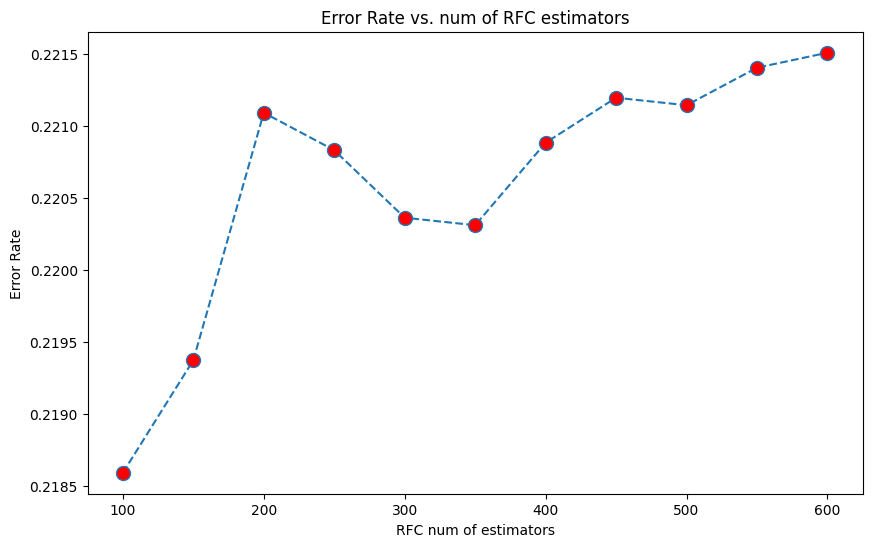

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(100,601,50),error,linestyle = '--',
         marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. num of RFC estimators')
plt.xlabel('RFC num of estimators')
plt.ylabel('Error Rate')

**It looks like the optimum is at 100 estimators, hence, we will go ahead and try a model with 100 estimators.**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

**Predicting campaign conversion using KNN:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

**Comparing classfication reports:**

In [ ]:
print('Logistic regression classfication report: \n')
print(classification_report(y_test,pred_log))

Logistic regression classfication report: 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     16431
           1       1.00      0.00      0.00      2769

    accuracy                           0.86     19200
   macro avg       0.93      0.50      0.46     19200
weighted avg       0.88      0.86      0.79     19200



In [ ]:
print('Decision Tree classfication report: \n')
print(classification_report(y_test,pred_dtree))

Decision Tree classfication report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     16431
           1       0.17      0.16      0.16      2769

    accuracy                           0.76     19200
   macro avg       0.51      0.51      0.51     19200
weighted avg       0.76      0.76      0.76     19200



In [ ]:
print('RFC classfication report: \n')
print(classification_report(y_test,pred_rfc))

RFC classfication report: 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     16431
           1       0.17      0.14      0.15      2769

    accuracy                           0.78     19200
   macro avg       0.52      0.51      0.51     19200
weighted avg       0.76      0.78      0.77     19200



In [ ]:
print('KNN classfication report: \n')
print(classification_report(y_test,pred_knn))

KNN classfication report: 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     16431
           1       0.17      0.17      0.17      2769

    accuracy                           0.76     19200
   macro avg       0.52      0.52      0.52     19200
weighted avg       0.76      0.76      0.76     19200





1.   Logistic regression has the highes f1-score for predicting non-converted customers, however since it is more important for us to predict converted customers we will not be using a logistic regression.
2.   In terms of models, which have performed the best when it comes to predicting customers who have converted, it boils down to two models: KNN and Decision Tree. KNN has the highest f1-score at 0.17, followed by decision tree and RFC at 0.16. 

We will explore this further below:


**Comparing confusion matrices:**

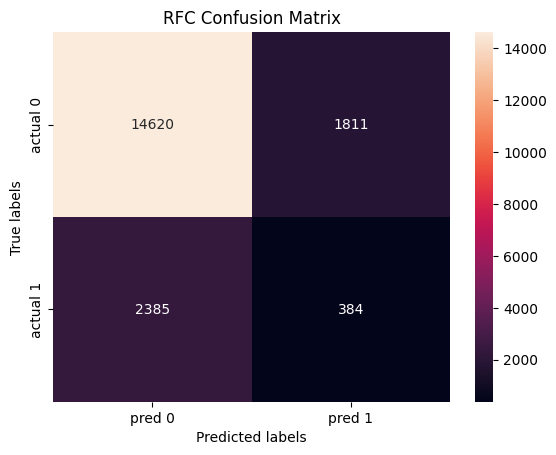

In [ ]:
# print('Random forest confusion matrix:')
# print(confusion_matrix(y_test,pred_rfc))
import seaborn as sns
import matplotlib.pyplot as plt     


conf_rfc = confusion_matrix(y_test,pred_rfc)
ax= plt.subplot()

sns.heatmap(conf_rfc, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('RFC Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pred 0', 'pred 1']); ax.yaxis.set_ticklabels(['actual 0', 'actual 1']);

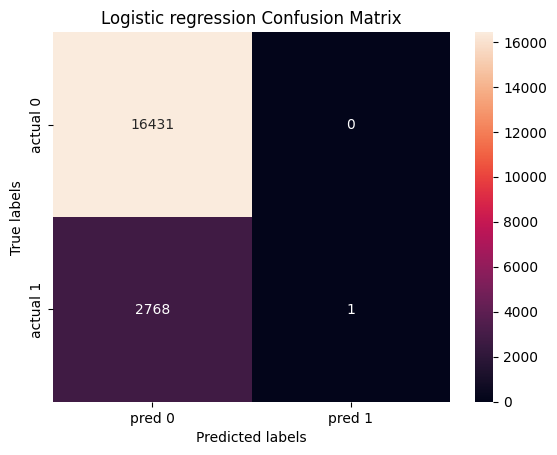

In [ ]:
# print('Logistic regression confusion matrix:')
# print(confusion_matrix(y_test,pred_log))

conf_log = confusion_matrix(y_test,pred_log)
ax= plt.subplot()

sns.heatmap(conf_log, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic regression Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pred 0', 'pred 1']); ax.yaxis.set_ticklabels(['actual 0', 'actual 1']);



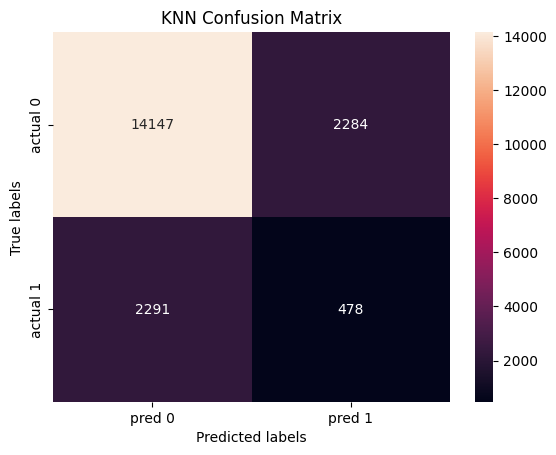

In [ ]:
# print('KNN confusion matrix:')
# print(confusion_matrix(y_test,pred_knn))

conf_knn = confusion_matrix(y_test,pred_knn)
ax= plt.subplot()

sns.heatmap(conf_knn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('KNN Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pred 0', 'pred 1']); ax.yaxis.set_ticklabels(['actual 0', 'actual 1']);


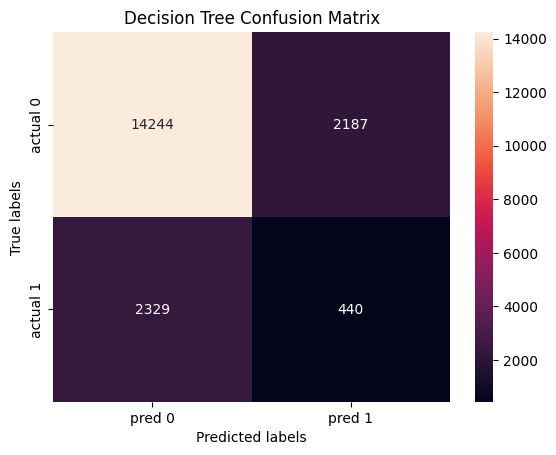

In [ ]:
conf_dtree = confusion_matrix(y_test,pred_dtree)
ax= plt.subplot()

sns.heatmap(conf_dtree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Tree Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pred 0', 'pred 1']); ax.yaxis.set_ticklabels(['actual 0', 'actual 1']);

In [ ]:
y_test.sum()

2769

# **Takeaways:**

**KNN has the best true positive rate:**


1.  It is important for us to priortise true positives over true negatives for a marketing campaign. We would like to improve the rate at which we are predicting customer conversion over the rate at which we are predicting customers who are not likely to convert.  Thus, it is best to see which model has the best true positive rate.
2.   KNN seems to have done the best in terms of predicting 478 true positives. In our dataset there are 2769 actual positives. This gives us a true positive rate of 17.23%, which is not high but is the best rate out of the other models. This is closely followed by the decision tree model that gives us 440 true positives. Overall, it might help if we re-ran the model with a bigger sample size, more demographic variables and data from across time periods to improve the accuracy of prediction.








**Steps that might help us improve prediction:**

 **A larger sample:**



*   Overall, even the best model has only given us a 17.23% rate of predicting customers who are converting. This is not optimum by any means. To improve our model we might need a bigger sample with a wider range of information. 

*   Currently our sample is less than 6500 records, it would help if we had an idea of the size of the total business as we can pick a sample accordingly.







**How can more information help us fine tune our model?**



*   The dataset is entirely missing information on demographics and misses some key information on customer buying patterns.

*   On demographics: It would help if we had information on age, sex, income type, profession etc. This would help us understand how the customer profile of converted individuals differs from non-converted individuals.

*   It would also help to have deeper customer behaviour metrics. What type of products are customers buying? How many repeat purchases? What pricing is more likely to convert customers? How many online vs offline purchases? All of this would help us understand metrics of the product that attract the customer. This allows us to build a profile for conversion based on product metrics.

*   In addition, having data from across time periods might help us understand how the models perform with different data across time periods. Currently we have two models (KNN/Decision Tree) that have performed closely. It is possible that if we repeat these tests from data across a different time period, the outputs may vary. For e.g customer buying patterns may vary during covid vs pre-covid. Currently we do not have information on time period of the sample to understand buying context.






